In [106]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as w
w.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [107]:
df=pd.read_csv('Banglore_traffic_Dataset.csv')
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [108]:
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

Missing values per column:
 Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64


In [109]:
df.describe(include="all")

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
count,8936,8936,8936,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936,8936
unique,952,8,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2
top,2023-01-24,Indiranagar,100 Feet Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,No
freq,15,1720,860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5426,8054
mean,NaN,NaN,NaN,29236.048120,39.447427,1.375554,80.818041,92.029215,1.570389,108.472096,45.086651,79.950243,75.155597,114.533348,NaN,NaN
std,NaN,NaN,NaN,13001.808801,10.707244,0.165319,23.533182,16.583341,1.420047,26.003618,20.208460,11.585006,14.409394,36.812573,NaN,NaN
min,NaN,NaN,NaN,4233.000000,20.000000,1.000039,5.160279,18.739771,0.000000,58.466000,10.006853,60.003933,50.020411,66.000000,NaN,NaN
25%,NaN,NaN,NaN,19413.000000,31.775825,1.242459,64.292905,97.354990,0.000000,88.826000,27.341191,69.828270,62.545895,94.000000,NaN,NaN
50%,NaN,NaN,NaN,27600.000000,39.199368,1.500000,92.389018,100.000000,1.000000,105.200000,45.170684,79.992773,75.317610,102.000000,NaN,NaN
75%,NaN,NaN,NaN,38058.500000,46.644517,1.500000,100.000000,100.000000,2.000000,126.117000,62.426485,89.957358,87.518589,111.000000,NaN,NaN


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [111]:
# 3. Parse datetimes and create useful time features
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday

In [112]:
df['Congestion Level'] = pd.to_numeric(df['Congestion Level'], errors='coerce')

# Create categories
df['congestion_cat'] = pd.cut(
    df['Congestion Level'],
    bins=[-1, 40, 70, 100],
    labels=['low', 'medium', 'high']
)

# Convert to numbers 0,1,2
mapping = {'low': 0, 'medium': 1, 'high': 2}
df['congestion_num'] = df['congestion_cat'].map(mapping)

print(df[['Congestion Level', 'congestion_cat', 'congestion_num']].head())

   Congestion Level congestion_cat congestion_num
0        100.000000           high              2
1        100.000000           high              2
2         28.347994            low              0
3        100.000000           high              2
4        100.000000           high              2


In [113]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,...,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,year,month,day,weekday,congestion_cat,congestion_num
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,...,85.403629,111,Clear,No,2022,1,1,5,high,2
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,...,59.983689,100,Clear,No,2022,1,1,5,high,2
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,...,95.466020,189,Clear,No,2022,1,1,5,low,0
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,...,63.567452,111,Clear,No,2022,1,1,5,high,2
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,...,93.155171,104,Clear,No,2022,1,1,5,high,2


In [114]:
df["Area Name"].value_counts()

Area Name
Indiranagar        1720
M.G. Road          1501
Koramangala        1364
Jayanagar          1173
Hebbal              950
Whitefield          942
Yeshwanthpur        734
Electronic City     552
Name: count, dtype: int64

In [115]:
avg_vol_by_road = df.groupby('Road/Intersection Name')['Traffic Volume'].mean().sort_values(ascending=False)
top10 = avg_vol_by_road.head(10)
top10

Road/Intersection Name
Sony World Junction    41470.801170
Sarjapur Road          40189.950000
Trinity Circle         35350.137466
Anil Kumble Circle     35251.828722
CMH Road               32611.924419
100 Feet Road          31956.852326
Hebbal Flyover         26794.924051
Ballari Road           26272.640756
South End Circle       24704.119730
Jayanagar 4th Block    24496.236207
Name: Traffic Volume, dtype: float64

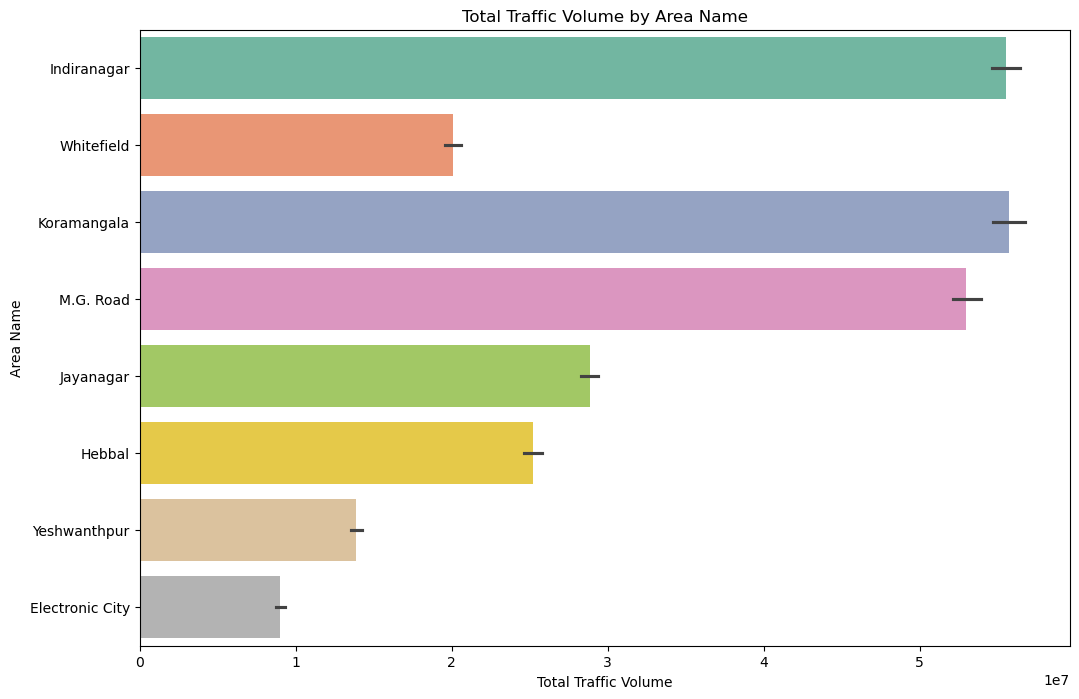

Looking at this graph we can see that the Indranagar, Whitefield, Koramangala have High traffic volumes


In [116]:
# Bar plot of Traffic Volume by Area Name
plt.figure(figsize=(12, 8))
sns.barplot(x='Traffic Volume', y='Area Name', data=df, estimator=sum, palette="Set2")
plt.title('Total Traffic Volume by Area Name')
plt.xlabel('Total Traffic Volume')
plt.ylabel('Area Name')
plt.savefig("Traffic volume by Area.png")
plt.show()
print("Looking at this graph we can see that the Indranagar, Whitefield, Koramangala have High traffic volumes")

In [117]:
Area_intersec = df.pivot_table(values = "Traffic Volume", index = ["Area Name", "Road/Intersection Name"], aggfunc = [np.mean, np.sum])
Area_intersec

mean            sum
                                       Traffic Volume Traffic Volume
Area Name       Road/Intersection Name                              
Electronic City Hosur Road               16557.223827        4586351
                Silk Board Junction      16134.534545        4436997
Hebbal          Ballari Road             26272.640756       12505777
                Hebbal Flyover           26794.924051       12700794
Indiranagar     100 Feet Road            31956.852326       27482893
                CMH Road                 32611.924419       28046255
Jayanagar       Jayanagar 4th Block      24496.236207       14207817
                South End Circle         24704.119730       14649543
Koramangala     Sarjapur Road            40189.950000       27329166
                Sony World Junction      41470.801170       28366028
M.G. Road       Anil Kumble Circle       35251.828722       26756138
                Trinity Circle           35350.137466       26229802
Whitefield      ITPL Main Road           21866.037778        9839717
                Marathahalli Bridge      20772.953252       10220293
Yeshwanthpur    Tumkur Road              18574.490305        6705391
                Yeshwanthpur Circle      19277.115282        7190364

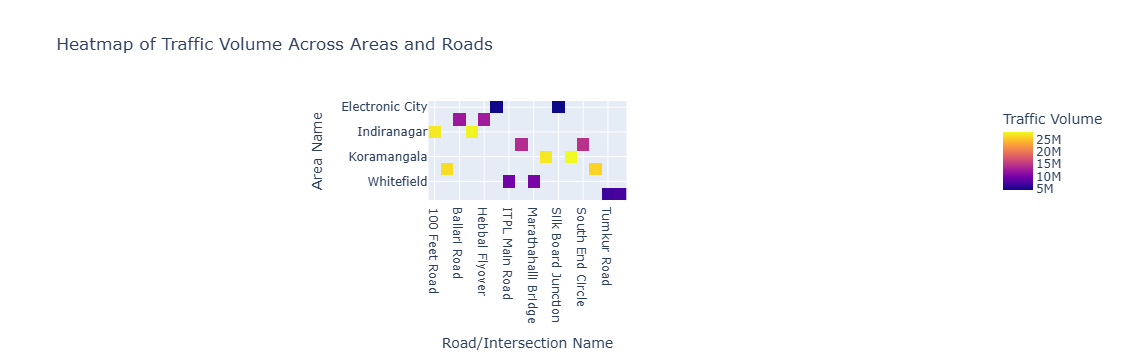

In [118]:
heatmap_data = df.pivot_table(values='Traffic Volume', index='Area Name', columns='Road/Intersection Name', aggfunc='sum')
fig = px.imshow(heatmap_data, labels=dict(x="Road/Intersection Name", y="Area Name", color="Traffic Volume"),
                title="Heatmap of Traffic Volume Across Areas and Roads")
plt.savefig("Traffic volume accros Area and road.png")
fig.show()

<Figure size 640x480 with 0 Axes>

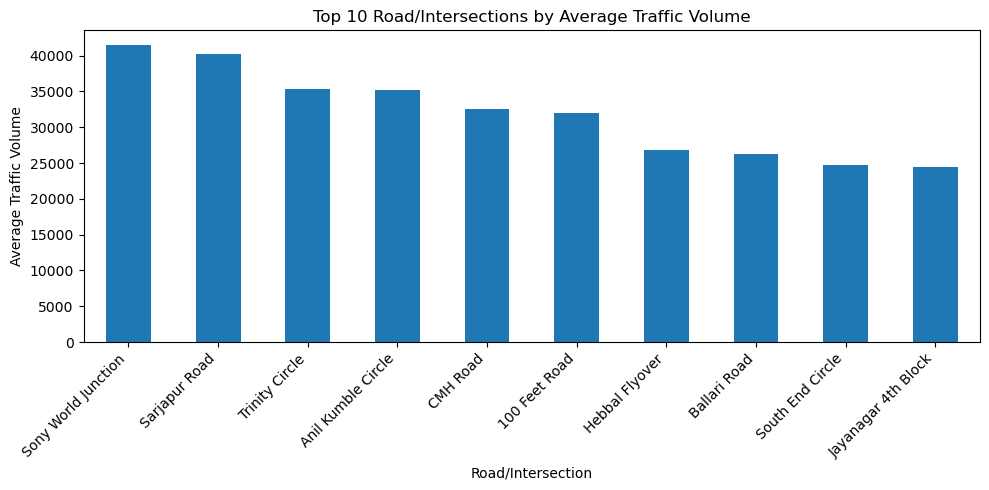

In [119]:
avg_vol_by_road = df.groupby('Road/Intersection Name')['Traffic Volume'].mean().sort_values(ascending=False)
top10 = avg_vol_by_road.head(10)

plt.figure(figsize=(10,5))
top10.plot(kind='bar')
plt.title("Top 10 Road/Intersections by Average Traffic Volume")
plt.xlabel("Road/Intersection")
plt.ylabel("Average Traffic Volume")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top10_volume.png")
plt.show()

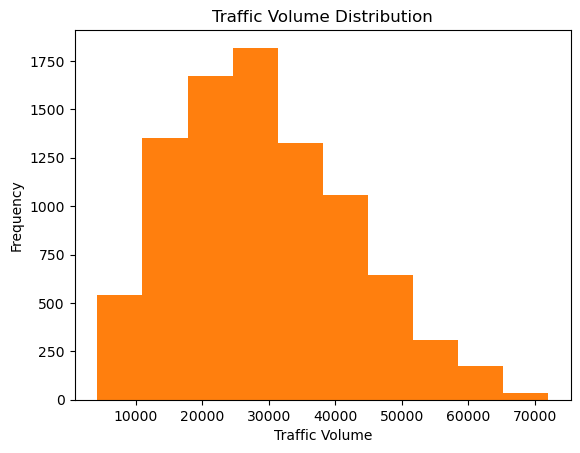

In [134]:
plt.hist(df['Traffic Volume'])
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title("Traffic Volume Distribution")
plt.savefig("traffic_volume.png")
plt.show()

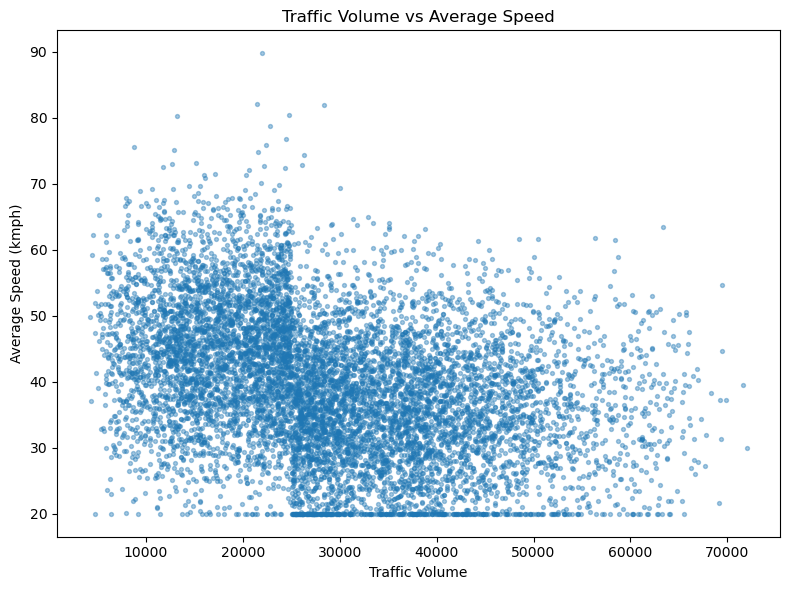

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(df['Traffic Volume'], df['Average Speed'], alpha=0.4, s=8)
plt.title("Traffic Volume vs Average Speed")
plt.xlabel("Traffic Volume")
plt.ylabel("Average Speed (kmph)")
plt.tight_layout()
plt.savefig("speed_vs_volume.png")
plt.show()

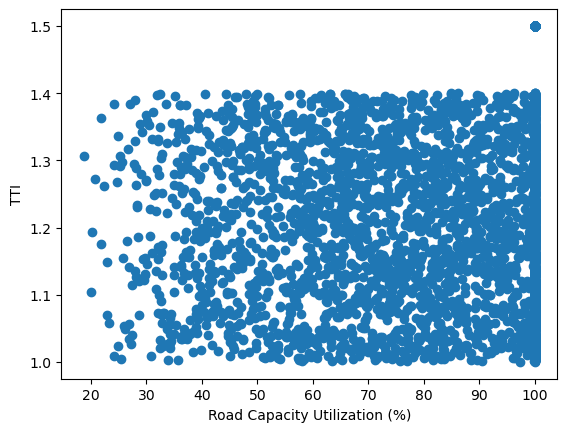

In [128]:
#Road capacity increases time travel increases
plt.scatter(df["Road Capacity Utilization"], df["Travel Time Index"])
plt.xlabel("Road Capacity Utilization (%)")
plt.ylabel("TTI")
plt.savefig("rcu_tti.png")
plt.show()

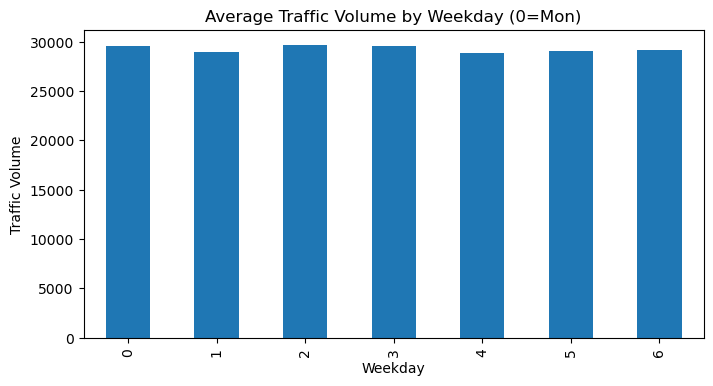

In [132]:
# weekday
group_w = df.groupby('weekday')['Traffic Volume'].mean()
plt.figure(figsize=(8,4))
group_w.plot(kind='bar')
plt.title("Average Traffic Volume by Weekday (0=Mon)")
plt.xlabel("Weekday")
plt.ylabel("Traffic Volume")
plt.savefig("volume_by_weekday.png")
plt.show()

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = [
    'Traffic Volume', 'Average Speed', 'Travel Time Index',
    'Road Capacity Utilization', 'Public Transport Usage',
    'Parking Usage', 'Incident Reports'
]

X = df[features]
y = df['congestion_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.9463087248322147


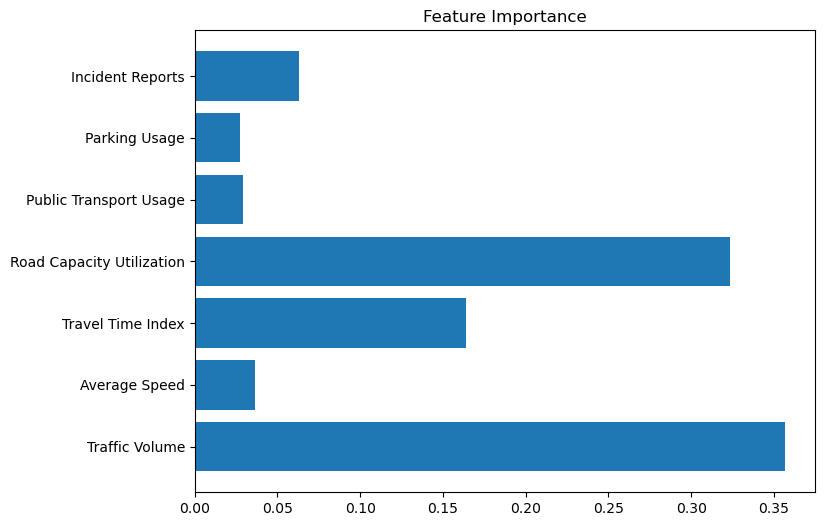

In [139]:
plt.figure(figsize=(8,6))
plt.barh(features, model.feature_importances_)
plt.title("Feature Importance")
plt.savefig("feature_importance.png")
plt.show()

In [142]:
iso = IsolationForest(n_estimators=200, contamination=0.01, random_state=42) 
X_iso = df[['Traffic Volume','Average Speed','Incident Reports']].fillna(0) 
df['anomaly_score'] = iso.fit_predict(X_iso) 
anomalies = df[df['anomaly_score']==-1] 
print("Anomalous events (sample):", anomalies[['Date','Road/Intersection Name','Traffic Volume','Average Speed','Incident Reports']].head())

Anomalous events (sample):           Date Road/Intersection Name  Traffic Volume  Average Speed  \
210 2022-01-24    Sony World Junction           62021      36.958452   
245 2022-01-28          Sarjapur Road           61743      20.000000   
287 2022-02-01    Sony World Junction           67693      27.253850   
367 2022-02-09         Hebbal Flyover           40230      28.281326   
420 2022-02-15    Sony World Junction           64412      49.419424   

     Incident Reports  
210                 5  
245                 4  
287                 4  
367                 7  
420                 0  
